# Gradient Descent


In [24]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

c:\Users\NC.DESKTOP-8TG1B6T\Envs\dltorch\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  """


### Gradient descent in 1D

In [35]:
def f(x):
  return 3*x**2 - 3*x + 4

def derivative(x):
  return 6*x -3

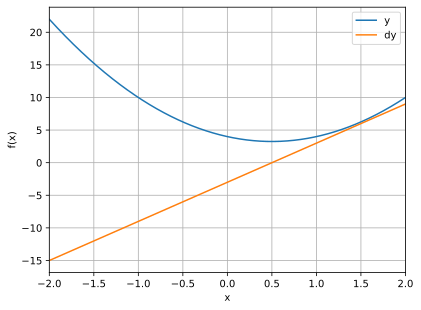

In [36]:
x = np.linspace(-2, 2, 2000)

plt.plot(x, f(x), x, derivative(x))
plt.xlim(x[0], x[-1])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [37]:
localmin = np.random.choice(x, 1)
print(f'random starting value: {localmin}')

random starting value: [0.50725363]


In [38]:
def gradient_descent(startValue, lr=0.01, epochs=100):
  modelparams = np.zeros((epochs,2))
  localmin = startValue

  for i in range(epochs):
    grad = derivative(localmin)
    localmin = localmin - lr*grad
    modelparams[i, :] = localmin, grad
  return modelparams

In [39]:
modelparams = gradient_descent(localmin)

c:\Users\NC.DESKTOP-8TG1B6T\Envs\dltorch\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  


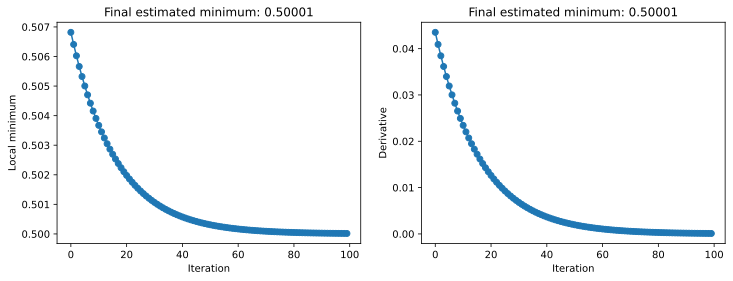

In [41]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {modelparams[-1, 0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

### Random initialize start value 

In [59]:
def fx(x):
  return np.cos(2*np.pi*x) + x**2

def derivative(x):
  return -2*np.pi*np.sin(2* np.pi*x) + 2*x

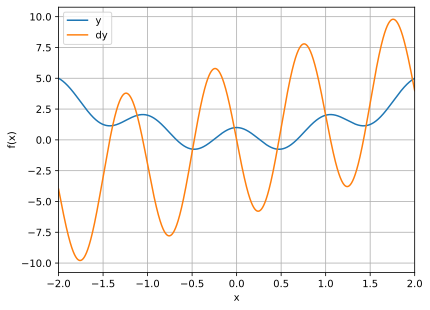

In [64]:
x = np.linspace(-2,2,2000)

plt.plot(x,fx(x), x,derivative(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [65]:
localmin = np.array([0])

In [66]:
modelparams = gradient_descent(localmin)
localmin = modelparams[-1, 0]

c:\Users\NC.DESKTOP-8TG1B6T\Envs\dltorch\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  


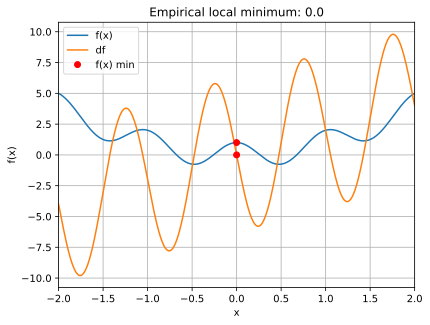

In [67]:
plt.plot(x,fx(x), x,derivative(x))
plt.plot(localmin,derivative(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin)
plt.show()

c:\Users\NC.DESKTOP-8TG1B6T\Envs\dltorch\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  


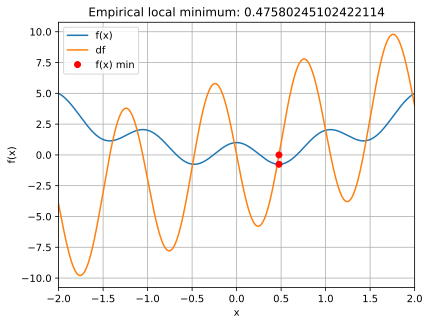

In [68]:
localmin = np.array([0.001])

modelparams = gradient_descent(localmin)
localmin = modelparams[-1, 0]

plt.plot(x,fx(x), x,derivative(x))
plt.plot(localmin,derivative(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin)
plt.show()

### Run parametric experiments 

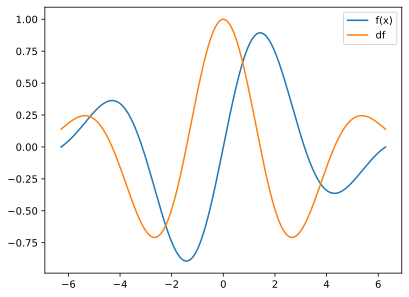

In [76]:
x  = np.linspace(-2*np.pi,2*np.pi,401)

def fx(x):
  return np.sin(x) * np.exp(-x**2*.05)

def deriv(x):
  return np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.05)

plt.plot(x,fx(x), x,deriv(x))
plt.legend(['f(x)','df']);

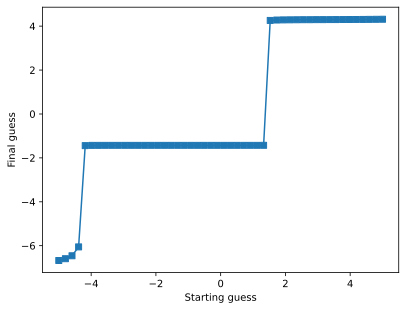

In [77]:
# Thử với nhiều điểm bắt đầu khác nhau
startlocs = np.linspace(-5,5,50)
finalres = np.zeros(len(startlocs))
learning_rate = 0.01
epochs = 1000

for idx,localmin in enumerate(startlocs):
  for i in range(epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
  
  finalres[idx] = localmin

plt.plot(startlocs,finalres,'s-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

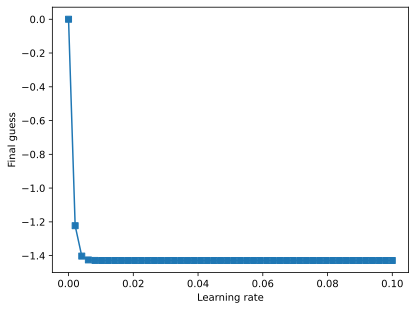

In [78]:
# Thử với các giá trị learning_rate
learningrates = np.linspace(1e-10,1e-1,50)
finalres = np.zeros(len(learningrates))

for idx,learningRate in enumerate(learningrates):
  localmin = 0 # start always 0
  for i in range(epochs):
    grad = deriv(localmin)
    localmin = localmin - learningRate*grad
  
  # store the final guess
  finalres[idx] = localmin


plt.plot(learningrates,finalres,'s-')
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.show()